<a href="https://colab.research.google.com/github/pushpam-raghuvanshi/rossmann_sales_prediction/blob/main/Rossmann_Sales_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

## <b> Mounting the Google Drive </b>

In [1]:
# Mounting the Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## <b> Importing Libraries </b>

In [2]:
# Importing Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## <b> Loading Datasets </b>

In [3]:
# Loading the Datasets
# Rossmann Stores Data.csv - Historical Data including Sales
file_path_1 = '/content/drive/MyDrive/AlmaBetter/Capstone Projects /Retail Sales Prediction - Pushpam Raghuvanshi/Data & Resources/Rossmann Stores Data.csv'
df1 = pd.read_csv(file_path_1, parse_dates = True, index_col = 'Date')
# store.csv - Supplemental information about the stores
file_path_2 = '/content/drive/MyDrive/AlmaBetter/Capstone Projects /Retail Sales Prediction - Pushpam Raghuvanshi/Data & Resources/store.csv'
df2 = pd.read_csv(file_path_2)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## <b> Overview of Datasets </b>

In [4]:
print('Number of records and features', df1.shape)
df1.head()

Number of records and features (1017209, 8)


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1
2015-07-31,2,5,6064,625,1,1,0,1
2015-07-31,3,5,8314,821,1,1,0,1
2015-07-31,4,5,13995,1498,1,1,0,1
2015-07-31,5,5,4822,559,1,1,0,1


In [5]:
print('Number of records and features', df2.shape)
df2.head()

Number of records and features (1115, 10)


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [6]:
# Summary of Dataset 
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1017209 entries, 2015-07-31 to 2013-01-01
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Sales          1017209 non-null  int64 
 3   Customers      1017209 non-null  int64 
 4   Open           1017209 non-null  int64 
 5   Promo          1017209 non-null  int64 
 6   StateHoliday   1017209 non-null  object
 7   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 69.8+ MB


In [7]:
# Summary of Dataset 
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [8]:
# Analyzing Null Values for both the Datasets
print('df1 \n',df1.isnull().sum(),'\n\n')
print('df2 \n',df2.isnull().sum())

df1 
 Store            0
DayOfWeek        0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64 


df2 
 Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64


In [9]:
# Handling Missing Values
df2['Promo2SinceWeek'] = df2['Promo2SinceWeek'].fillna(0)
df2['Promo2SinceYear'] = df2['Promo2SinceYear'].fillna(0)
df2['PromoInterval'] = df2['PromoInterval'].fillna(0)
df2['CompetitionDistance'] = df2['CompetitionDistance'].fillna(df2['CompetitionDistance'].median())
df2['CompetitionOpenSinceMonth'] = df2['CompetitionOpenSinceMonth'].fillna(df2['CompetitionOpenSinceMonth'].mode().iloc[0])
df2['CompetitionOpenSinceYear'] = df2['CompetitionOpenSinceYear'].fillna(df2['CompetitionOpenSinceYear'].mode().iloc[0])

In [10]:
print(df2.isnull().sum())

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64


In [11]:
# Extracting year, month, day and week of year from "Date"
df1['Year'] = df1.index.year
df1['Month'] = df1.index.month
df1['Day'] = df1.index.day
df1['WeekOfYear'] = df1.index.weekofyear
df1 = df1.reset_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  """


In [12]:
# Checking for duplicates 
print(df1.duplicated().sum())
print(df2.duplicated().sum())

0
0


## <b> Merging both the Datasets </b>

In [13]:
# Joining Both the Dataframes 
df = pd.merge(df1, df2, how='left', on='Store')

## <b> Understanding the Dataset </b>

In [14]:
df.head()

,Date,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,...,WeekOfYear,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,2015-07-31,1,5,5263,555,1,1,0,1,2015,...,31,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2015-07-31,2,5,6064,625,1,1,0,1,2015,...,31,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,2015-07-31,3,5,8314,821,1,1,0,1,2015,...,31,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,2015-07-31,4,5,13995,1498,1,1,0,1,2015,...,31,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,2015-07-31,5,5,4822,559,1,1,0,1,2015,...,31,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


In [15]:
df.sample(5)

,Date,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,...,WeekOfYear,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
381459,2014-07-29,195,2,11327,1212,1,1,0,1,2014,...,31,a,c,220.0,9.0,2013.0,0,0.0,0.0,0
555679,2014-02-18,80,2,8677,586,1,1,0,0,2014,...,8,d,a,7910.0,9.0,2013.0,0,0.0,0.0,0
780352,2013-08-01,638,4,6412,515,1,1,0,1,2013,...,31,d,a,10170.0,11.0,2001.0,0,0.0,0.0,0
17898,2015-07-15,59,3,6437,590,1,1,0,1,2015,...,29,a,c,2840.0,6.0,2007.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
862606,2013-05-19,382,7,0,0,0,0,0,0,2013,...,20,c,c,26130.0,11.0,2002.0,0,0.0,0.0,0


In [16]:
df.tail()

,Date,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,...,WeekOfYear,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1017204,2013-01-01,1111,2,0,0,0,0,a,1,2013,...,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,2013-01-01,1112,2,0,0,0,0,a,1,2013,...,1,c,c,1880.0,4.0,2006.0,0,0.0,0.0,0
1017206,2013-01-01,1113,2,0,0,0,0,a,1,2013,...,1,a,c,9260.0,9.0,2013.0,0,0.0,0.0,0
1017207,2013-01-01,1114,2,0,0,0,0,a,1,2013,...,1,a,c,870.0,9.0,2013.0,0,0.0,0.0,0
1017208,2013-01-01,1115,2,0,0,0,0,a,1,2013,...,1,d,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [17]:
len(df)

1017209

In [18]:
df.columns

Index(['Date', 'Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'Day', 'WeekOfYear',
       'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [19]:
df.duplicated().sum()

0

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 22 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Date                       1017209 non-null  datetime64[ns]
 1   Store                      1017209 non-null  int64         
 2   DayOfWeek                  1017209 non-null  int64         
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   Year                       1017209 non-null  int64         
 10  Month                      1017209 non-null  int64         
 11  Day                        1017209 no

In [21]:
# Changing datatype of some columns
df['CompetitionOpenSinceMonth'] = df['CompetitionOpenSinceMonth'].astype(int)
df['CompetitionOpenSinceYear'] = df['CompetitionOpenSinceYear'].astype(int)
df['Promo2SinceWeek'] = df['Promo2SinceWeek'].astype(int)
df['Promo2SinceYear'] = df['Promo2SinceYear'].astype(int)

In [22]:
df.describe().round(2)

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,Year,Month,Day,WeekOfYear,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1017209.00,1017209.0,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.0,1017209.00,1017209.00
mean,558.43,4.0,5773.82,633.15,0.83,0.38,0.18,2013.83,5.85,15.70,23.62,5422.02,7.79,2010.06,0.5,11.65,1007.01
std,321.91,2.0,3849.93,464.41,0.38,0.49,0.38,0.78,3.33,8.79,14.43,7706.92,2.78,5.34,0.5,15.32,1005.88
min,1.00,1.0,0.00,0.00,0.00,0.00,0.00,2013.00,1.00,1.00,1.00,20.00,1.00,1900.00,0.0,0.00,0.00
25%,280.00,2.0,3727.00,405.00,1.00,0.00,0.00,2013.00,3.00,8.00,11.00,710.00,6.00,2008.00,0.0,0.00,0.00
50%,558.00,4.0,5744.00,609.00,1.00,0.00,0.00,2014.00,6.00,16.00,22.00,2325.00,9.00,2012.00,1.0,1.00,2009.00
75%,838.00,6.0,7856.00,837.00,1.00,1.00,0.00,2014.00,8.00,23.00,35.00,6880.00,9.00,2013.00,1.0,22.00,2012.00
max,1115.00,7.0,41551.00,7388.00,1.00,1.00,1.00,2015.00,12.00,31.00,52.00,75860.00,12.00,2015.00,1.0,50.00,2015.00


## <b> Exploratory Data Analysis </b>

### **Correlation Heatmap**

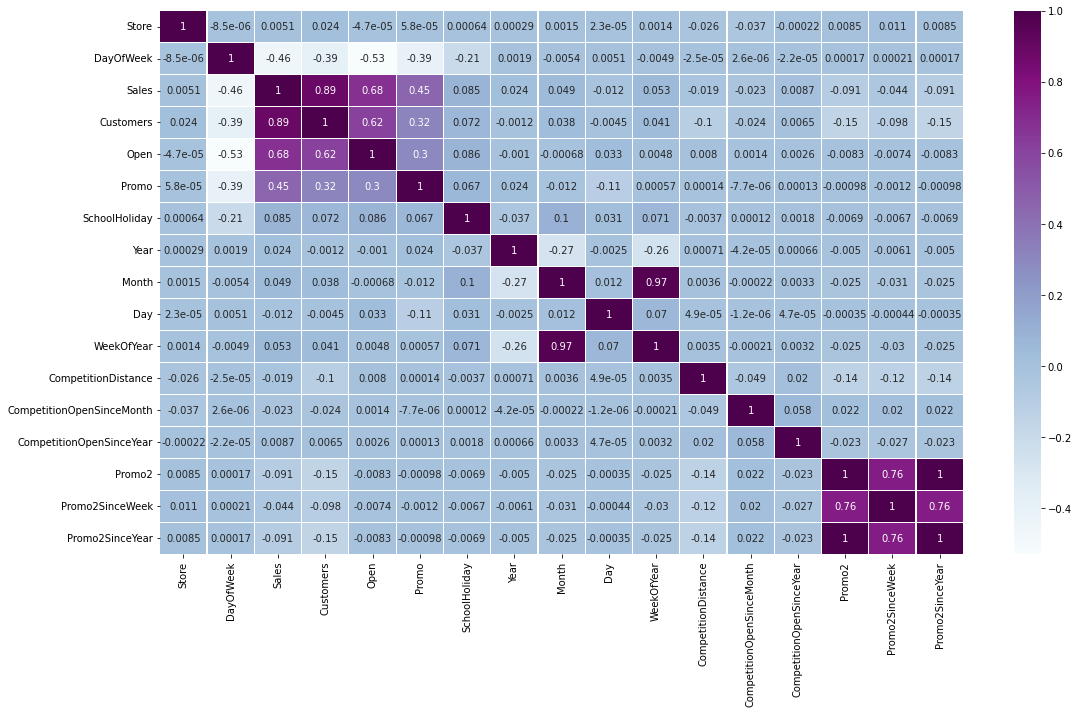

In [23]:
correlation = df.corr()
plt.figure(figsize=(18,10))
sns.heatmap(correlation, annot=True, linewidths=0.2, cmap='BuPu')

### **Scatter Plot - Sales and Customer**

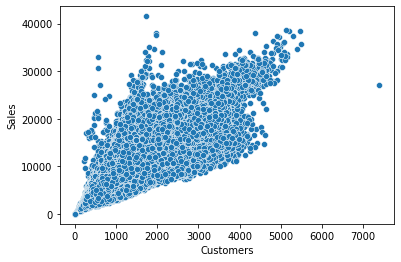

In [24]:
sns.scatterplot(x=df['Customers'], y=df['Sales'])

*   Observation - Scatterplot shows that relation between Sales and customer is sort of linear. Sales is increasing with the number of Customers increasing which is obvious.

### **Scatter Plot - Sales and CompetitionDistance**

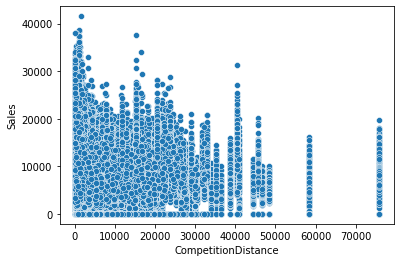

In [25]:
sns.scatterplot(x=df['CompetitionDistance'], y=df['Sales'])

### **Countplot - Store Open Closed**

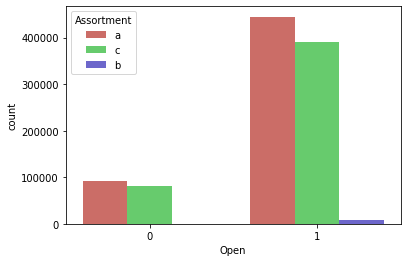

In [26]:
sns.countplot(x = df["Open"], hue = df['Assortment'], palette = 'hls')

### **Sales over Year**

Text(0.5, 0, 'Year/Month')

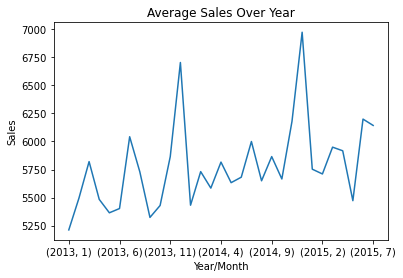

In [84]:
df.groupby(['Year', 'Month'])['Sales'].mean().plot.line()
plt.title('Average Sales Over Year')
plt.ylabel('Sales')
plt.xlabel('Year/Month')

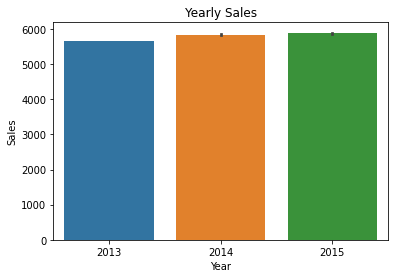

In [28]:
sns.barplot(x='Year', y='Sales', data=df).set(title='Yearly Sales')
plt.show()

*   Observation - Little increase in sales in successive year.

### **Sales over Month**

Text(0.5, 0, 'Month')

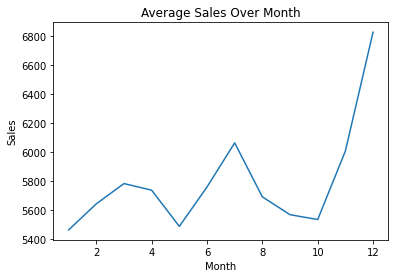

In [87]:
df.groupby(['Month'])['Sales'].mean().plot.line()
plt.title('Average Sales Over Month')
plt.ylabel('Sales')
plt.xlabel('Month')

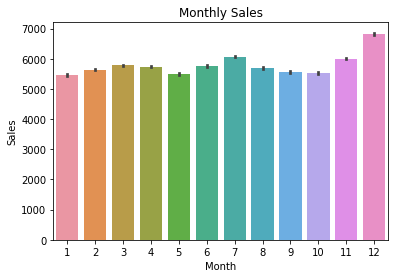

In [83]:
sns.barplot(x='Month', y='Sales', data=df).set(title='Monthly Sales')
plt.show()

### **Sales vs Promo**

[Text(0.5, 1.0, 'Sales vs Promo')]

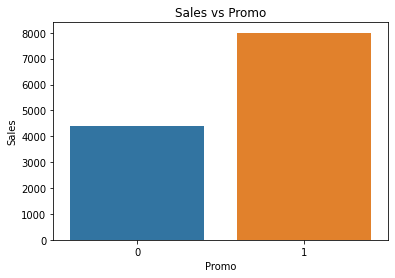

In [81]:
sns.barplot(x='Promo',y='Sales',data=df).set(title='Sales vs Promo')

*   Observation - More sales when promos are running.

### **Sales vs Assortment**

[Text(0.5, 1.0, 'Assortment vs Sales')]

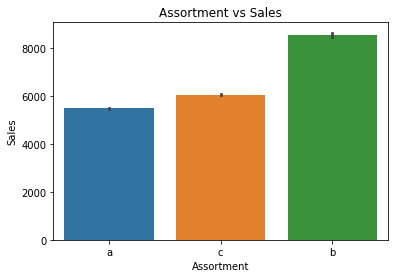

In [30]:
sns.barplot(x='Assortment', y='Sales', data=df).set(title='Assortment vs Sales')

*   Observation - Asortment Level 'b' has the highest sales and Level 'a' has the lowest sales.

### **Sales vs School Holiday**

[Text(0.5, 1.0, 'Sales vs School Holiday')]

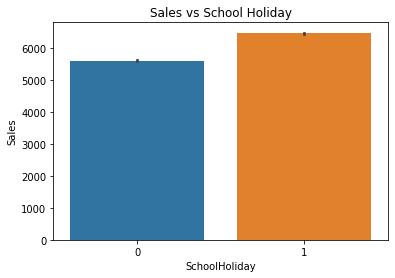

In [31]:
sns.barplot(x='SchoolHoliday', y='Sales', data=df).set(title='Sales vs School Holiday')

*   Observation - More sales on School Holidays.

### **Sales vs Day of Week**

[Text(0.5, 1.0, 'Sales vs Day of Week')]

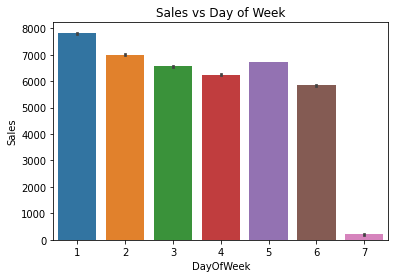

In [32]:
sns.barplot(x='DayOfWeek',y='Sales',data=df).set(title='Sales vs Day of Week')

*   Observation - More sales on Monday, Tuesday and Friday.  - Sunday has the lowest sale.

### **Sales vs StoreType**

[Text(0.5, 1.0, 'Sales vs StoreType')]

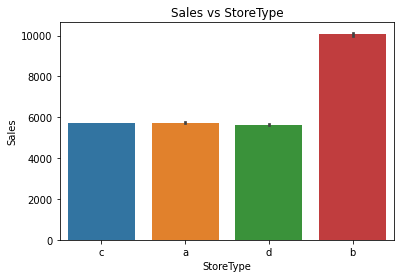

In [33]:
sns.barplot(x='StoreType', y='Sales', data=df).set(title='Sales vs StoreType')

*   Observation - StoreType 'b' has the highest sales.

### **Proportion of StoreTypes**

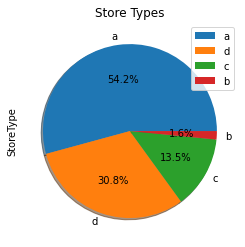

In [34]:
store_type = df['StoreType'].value_counts()
store_type.plot.pie(title='Store Types', legend=True, autopct='%1.1f%%', shadow=True)
plt.show()

### **Customer Proportion per StoreType**

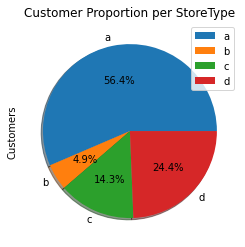

In [35]:
cust = df.groupby('StoreType')['Customers'].sum()
cust.plot.pie(title='Customer Proportion per StoreType', legend=True, autopct='%1.1f%%', shadow=True)
plt.show()

## <b> Feature Engineering </b>

In [36]:
# Making a copy of Dataframe (df) and further working on it
dfd = df.copy()

In [37]:
# list of columns in dfd dataframe
dfd.columns

Index(['Date', 'Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'Day', 'WeekOfYear',
       'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [38]:
# Filtering stores which are closed as they wont generate sales
dfd = dfd[dfd.Open != 0]

In [39]:
# Dropping Open column as it is not a variable anymore
dfd = dfd.drop('Open', axis=1)

In [40]:
# Stores with zero Sales
dfd[dfd.Sales == 0]['Store'].sum()

31460

In [41]:
# Percentage of open stored with zero sales
dfd[dfd.Sales == 0]['Store'].sum()/dfd.Sales.sum().round(2) * 100

0.0005356552440563345

In [42]:
# Filtering rows with Sales > 0
dfd = dfd[dfd.Sales != 0]

In [43]:
# Checking
dfd[dfd.Sales == 0]['Store'].sum()

0

In [44]:
dfd.columns

Index(['Date', 'Store', 'DayOfWeek', 'Sales', 'Customers', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'Day', 'WeekOfYear',
       'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [45]:
dfd.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Store,844338.0,558.42,321.73,1.0,280.0,558.0,837.0,1115.0
DayOfWeek,844338.0,3.52,1.72,1.0,2.0,3.0,5.0,7.0
Sales,844338.0,6955.96,3103.82,46.0,4859.0,6369.0,8360.0,41551.0
Customers,844338.0,762.78,401.19,8.0,519.0,676.0,893.0,7388.0
Promo,844338.0,0.45,0.50,0.0,0.0,0.0,1.0,1.0
SchoolHoliday,844338.0,0.19,0.40,0.0,0.0,0.0,0.0,1.0
Year,844338.0,2013.83,0.78,2013.0,2013.0,2014.0,2014.0,2015.0
Month,844338.0,5.85,3.32,1.0,3.0,6.0,8.0,12.0
Day,844338.0,15.84,8.68,1.0,8.0,16.0,23.0,31.0
WeekOfYear,844338.0,23.65,14.39,1.0,11.0,23.0,35.0,52.0


In [46]:
dfd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844338 entries, 0 to 1017190
Data columns (total 21 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Date                       844338 non-null  datetime64[ns]
 1   Store                      844338 non-null  int64         
 2   DayOfWeek                  844338 non-null  int64         
 3   Sales                      844338 non-null  int64         
 4   Customers                  844338 non-null  int64         
 5   Promo                      844338 non-null  int64         
 6   StateHoliday               844338 non-null  object        
 7   SchoolHoliday              844338 non-null  int64         
 8   Year                       844338 non-null  int64         
 9   Month                      844338 non-null  int64         
 10  Day                        844338 non-null  int64         
 11  WeekOfYear                 844338 non-null  int64  

In [47]:
# Nominal Variales
set(dfd.StateHoliday), set(dfd.StoreType), set(dfd.Assortment), set(dfd.PromoInterval)

({0, '0', 'a', 'b', 'c'},
 {'a', 'b', 'c', 'd'},
 {'a', 'b', 'c'},
 {0, 'Feb,May,Aug,Nov', 'Jan,Apr,Jul,Oct', 'Mar,Jun,Sept,Dec'})

In [48]:
# Converting number 0 to string 0 in StateHoliday column
dfd.loc[dfd.StateHoliday == 0,'StateHoliday'] = dfd.loc[dfd.StateHoliday == 0,'StateHoliday'].astype(str)

In [49]:
# Converting number 0 to string 0 in StateHoliday column
dfd.loc[dfd.PromoInterval == 0,'PromoInterval'] = dfd.loc[dfd.PromoInterval == '0','PromoInterval'].astype(str)

[Text(0.5, 1.0, 'Sales vs StateHoliday')]

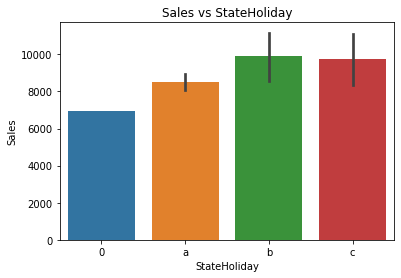

In [50]:
sns.barplot(x='StateHoliday', y='Sales', data=dfd).set(title='Sales vs StateHoliday')

In [51]:
# Encoding all categorical varibale to numeric values
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

dfd['StoreType'] = label_encoder.fit_transform(dfd['StoreType'])
dfd['Assortment'] = label_encoder.fit_transform(dfd['Assortment'])
dfd['StateHoliday'] = label_encoder.fit_transform(dfd['StateHoliday'])
dfd['PromoInterval'] = label_encoder.fit_transform(dfd['PromoInterval'])

dfd.head()

,Date,Store,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,Year,Month,...,WeekOfYear,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,2015-07-31,1,5,5263,555,1,0,1,2015,7,...,31,2,0,1270.0,9,2008,0,0,0,3
1,2015-07-31,2,5,6064,625,1,0,1,2015,7,...,31,0,0,570.0,11,2007,1,13,2010,1
2,2015-07-31,3,5,8314,821,1,0,1,2015,7,...,31,0,0,14130.0,12,2006,1,14,2011,1
3,2015-07-31,4,5,13995,1498,1,0,1,2015,7,...,31,2,2,620.0,9,2009,0,0,0,3
4,2015-07-31,5,5,4822,559,1,0,1,2015,7,...,31,0,0,29910.0,4,2015,0,0,0,3


In [52]:
dfd.columns

Index(['Date', 'Store', 'DayOfWeek', 'Sales', 'Customers', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'Day', 'WeekOfYear',
       'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [53]:
dfd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844338 entries, 0 to 1017190
Data columns (total 21 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Date                       844338 non-null  datetime64[ns]
 1   Store                      844338 non-null  int64         
 2   DayOfWeek                  844338 non-null  int64         
 3   Sales                      844338 non-null  int64         
 4   Customers                  844338 non-null  int64         
 5   Promo                      844338 non-null  int64         
 6   StateHoliday               844338 non-null  int64         
 7   SchoolHoliday              844338 non-null  int64         
 8   Year                       844338 non-null  int64         
 9   Month                      844338 non-null  int64         
 10  Day                        844338 non-null  int64         
 11  WeekOfYear                 844338 non-null  int64  

## **Rossmann Sales Prediction - ML Model Building**

- This ML Model will predict sales only on stores which are open and when there is some sales because there is no sales when store is closed.

In [54]:
from scipy.stats import zscore
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score as r2, mean_squared_error as mse
import math
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix,classification_report

In [55]:
# Defining Dependent Variable
dependent_variable = 'Sales'
# Defining Independent Varibale
independent_variables = list(dfd.columns.drop(['Date','Sales','Store']))

In [56]:
independent_variables

['DayOfWeek',
 'Customers',
 'Promo',
 'StateHoliday',
 'SchoolHoliday',
 'Year',
 'Month',
 'Day',
 'WeekOfYear',
 'StoreType',
 'Assortment',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Promo2SinceWeek',
 'Promo2SinceYear',
 'PromoInterval']

In [57]:
# Creating the data of independent variables
X = dfd[independent_variables].values

# Creating the data of dependent variable
y = dfd[dependent_variable].values

In [58]:
# Splitting the Dataset into Test and Train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(675470, 18)
(168868, 18)


### **Model - 1 - Linear Regression**

In [59]:
# Fitting Multiple Linear Regression to the Training set
# Formation of equation
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [60]:
# Intercept of equation
regressor.intercept_

-345128.7246962925

In [61]:
# Coefficients OR Model parameters of equation
regressor.coef_

array([-6.68250445e+01,  6.36639925e+00,  1.28927404e+03, -1.29655171e+03,
        3.73208586e+01,  1.76164646e+02,  4.83488362e+01,  1.26350928e+00,
       -2.01507690e+00,  2.72825866e+02,  2.16569624e+02,  2.83537985e-02,
       -1.34633742e+01, -4.25686165e+00,  1.24371840e+05,  1.01443774e+01,
       -6.19162081e+01, -9.33297059e+01])

In [62]:
# Predicting the Train set results
y_pred_train = regressor.predict(X_train)

In [63]:
# Predicting the Test set results
y_pred_test = regressor.predict(X_test)

In [64]:
# Test performance
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

MSE  = mean_squared_error(y_test, y_pred_test)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test, y_pred_test)
print("R2 :" ,r2)

MSE : 2307761.5772518045
RMSE : 1519.1318498576102
R2 : 0.7611592650795743


Text(0, 0.5, 'Predicted values')

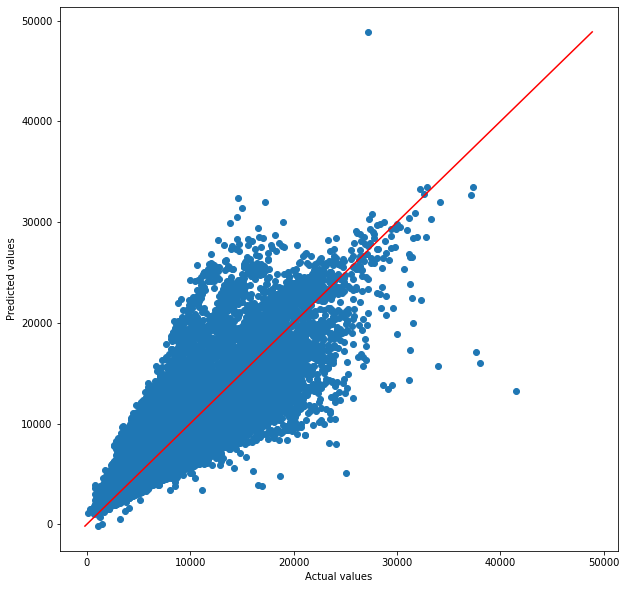

In [65]:
plt.figure(figsize=(10,10))
plt.scatter(y_test,y_pred_test)

p1 = max(max(y_pred_test),max(y_test))
p2 = min(min(y_pred_test),min(y_test))
plt.plot([p1,p2],[p1,p2],c='r')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

### **Model - 2 - Lasso Regression (L1)**

In [66]:
lasso = Lasso(alpha = 0.2, max_iter=10000)

In [67]:
lasso.fit(X_train, y_train)

Lasso(alpha=0.2, max_iter=10000)

In [68]:
y_pred_lasso = lasso.predict(X_test)

In [69]:
lasso.score(X_test, y_test)

0.7606908289265699

### **Model - 3 - Ridge Regression (L2)**

In [70]:
ridge = Ridge(alpha = 0.5)

In [71]:
ridge.fit(X_train, y_train)

Ridge(alpha=0.5)

In [72]:
ridge.predict(X_test)

array([5927.5619681 , 9174.72081906, 8253.13436679, ..., 2231.44661009,
       4305.68775067, 4353.58747894])

In [73]:
ridge.score(X_test, y_test)

0.7609335455978095

### **Model - 4 - Decision Tree**

In [74]:
dt = DecisionTreeRegressor(max_depth=5)

In [75]:
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [76]:
y_pred_dt = dt.predict(X_test)
y_train_dt = dt.predict(X_train)

In [77]:
# Print('dt_regressor R^2: ', r2(v_test,v_pred))
MSE  = mean_squared_error(y_test, y_pred_dt)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test, y_pred_dt)
print("R2 :" ,r2)

MSE : 2054241.5606572279
RMSE : 1433.2625581718194
R2 : 0.7873972039019176


### **Model - 5 - Random Forest**

In [78]:
random_forest=RandomForestRegressor(n_estimators =500,max_depth=8)
random_forest.fit(X_train, y_train)
y_pred_rf=random_forest.predict(X_test)

In [79]:
MSE  = mean_squared_error(y_test, y_pred_rf)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test, y_pred_rf)
print("R2 :" ,r2)

MSE : 1270712.0715407785
RMSE : 1127.2586533448207
R2 : 0.8684882320467108


Text(0, 0.5, 'Predicted values')

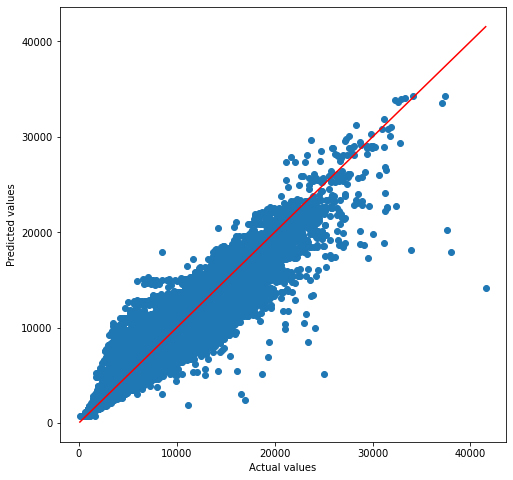

In [80]:
plt.figure(figsize=(8,8))
plt.scatter(y_test, y_pred_rf)

p1 = max(max(y_pred_rf),max(y_test))
p2 = min(min(y_pred_rf),min(y_test))
plt.plot([p1,p2],[p1,p2],c='r')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

### **Important Features**